In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import joblib

import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv")

In [3]:
df.head()

id  price      mark    model  year  mileage  engine_capacity transmission  \
0   0     80    nissan    march  2003    80000             1240           at   
1   1    110    nissan    march  2010    53000             1200           at   
2   2    165    nissan  lafesta  2005    47690             2000           at   
3   3    190    toyota  avensis  2008   130661             1990           at   
4   4    190  daihatsu     mira  2006    66300              660           at   

  drive hand_drive      fuel  
0   2wd        rhd  gasoline  
1   2wd        rhd  gasoline  
2   2wd        rhd  gasoline  
3   2wd        rhd  gasoline  
4   2wd        rhd  gasoline

In [4]:
pd.set_option('display.max_rows',None)

In [209]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [210]:
df.price

0         80
1        110
2        165
3        190
4        190
5        190
6        220
7        230
8        275
9        283
10       290
11       290
12       290
13       290
14       290
15       290
16       290
17       290
18       290
19       290
20       290
21       290
22       290
23       300
24       300
25       300
26       308
27       310
28       313
29       320
30       330
31       330
32       330
33       336
34       340
35       340
36       345
37       350
38       350
39       350
40       350
41       350
42       350
43       350
44       350
45       350
46       350
47       350
48       350
49       350
50       350
51       355
52       355
53       370
54       373
55       375
56       375
57       378
58       380
59       380
60       380
61       380
62       380
63       381
64       390
65       390
66       390
67       390
68       390
69       390
70       390
71       390
72       390
73       390
74       390
75       390
76       390

In [211]:
df.shape

(2318, 11)

# since the target variable is continous this is a Regression  problem statement

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


we are able to observe mark,model,transmission,drive,hand_drive,fuel as categorical columns

we can see id,price,year,mileage,engine_capacity as continous variables

In [6]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [7]:
df.id.nunique()

2318

since the id column is uniwue for each column it wont have any relation in the model we can drop that column

In [8]:
print(np.where(df.id==" "))

(array([], dtype=int64),)


In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
df.columns

Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

# Missing values

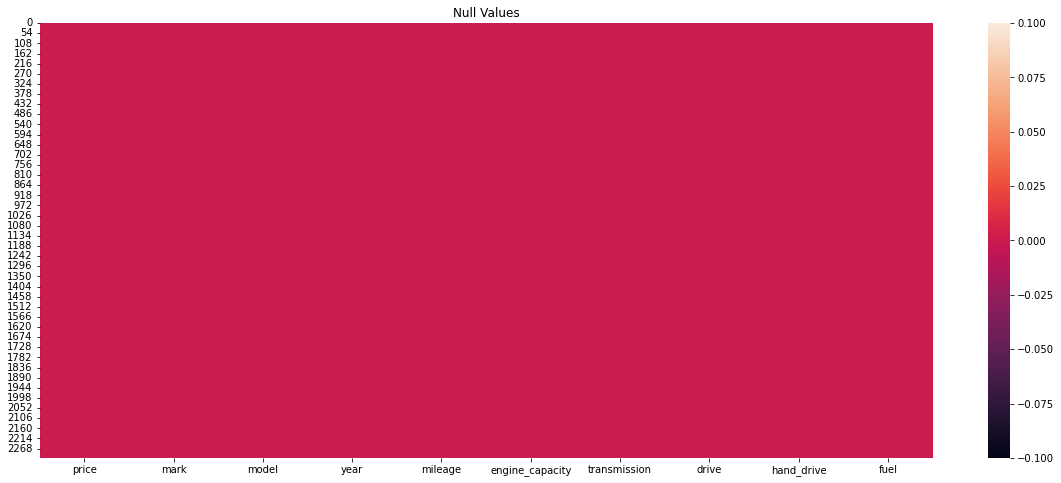

In [119]:
# heatmap on null values
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

there are no null values in the dataset 

# EDA

# Visualization

# Univariate analysis

<AxesSubplot:xlabel='price'>

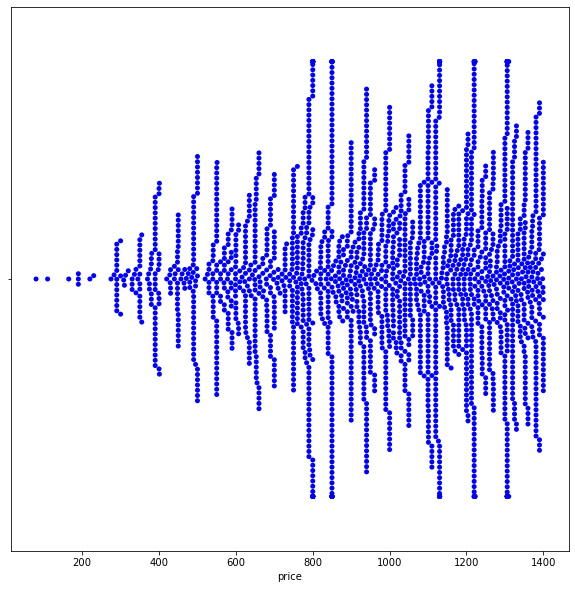

In [120]:
plt.figure(figsize=(10,10))
sns.swarmplot(df.price,color='blue',data=df)

<AxesSubplot:xlabel='year'>

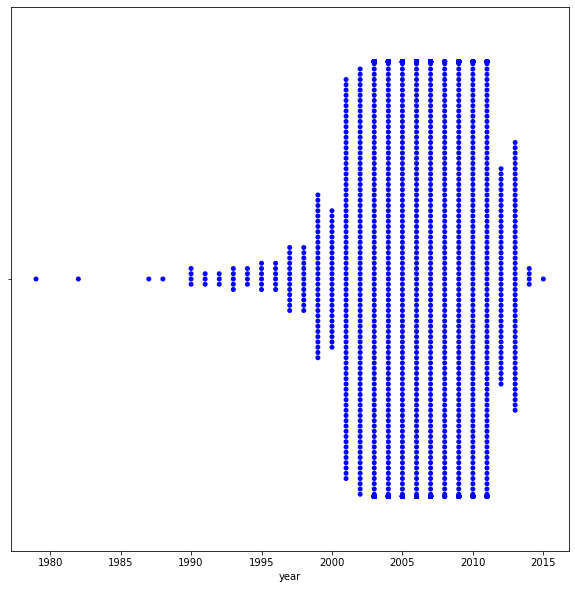

In [121]:
plt.figure(figsize=(10,10))
sns.swarmplot(df.year,color='blue',data=df)

<AxesSubplot:xlabel='engine_capacity'>

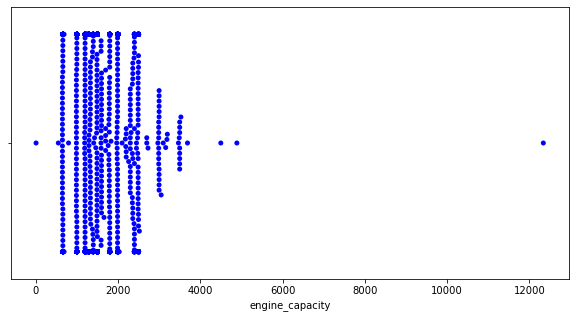

In [122]:
plt.figure(figsize=(10,5))
sns.swarmplot(df.engine_capacity,color='blue',data=df)

<AxesSubplot:ylabel='Frequency'>

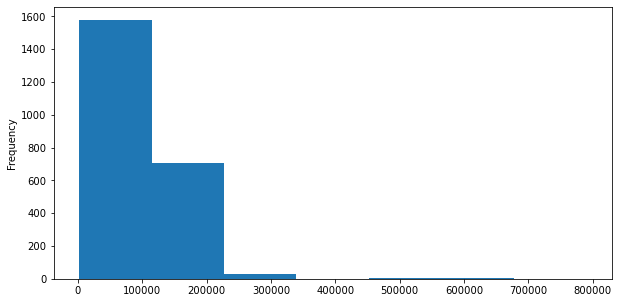

In [123]:
plt.figure(figsize=(10,5))
df.mileage.plot(kind='hist',bins=7)

<AxesSubplot:ylabel='Frequency'>

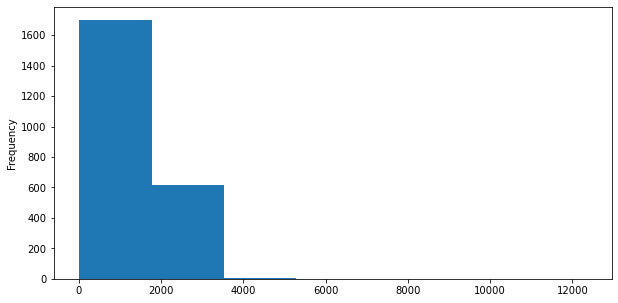

In [124]:
plt.figure(figsize=(10,5))
df.engine_capacity.plot(kind='hist',bins=7)

<AxesSubplot:ylabel='Frequency'>

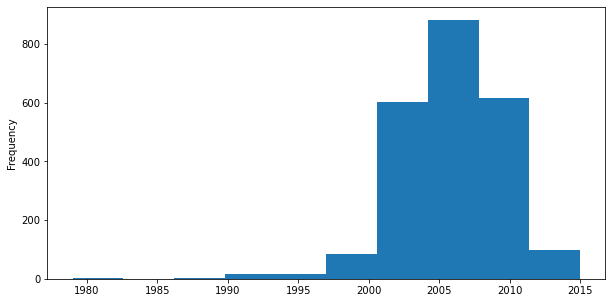

In [125]:
plt.figure(figsize=(10,5))
df.year.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

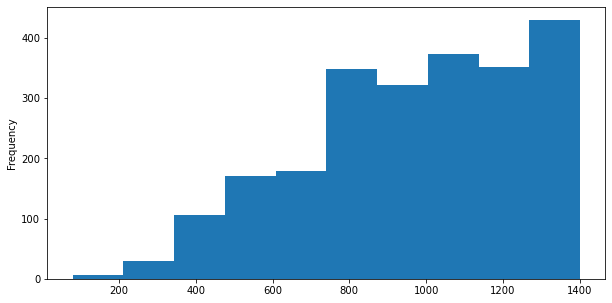

In [126]:
plt.figure(figsize=(10,5))
df.price.plot(kind='hist')

<AxesSubplot:xlabel='mark', ylabel='count'>

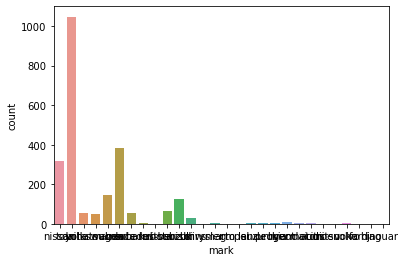

In [127]:
sns.countplot(df.mark)

<AxesSubplot:xlabel='model', ylabel='count'>

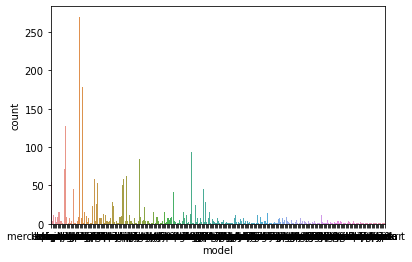

In [128]:
sns.countplot(df.model)

In [129]:
df.model.nunique()

258

<AxesSubplot:xlabel='transmission', ylabel='count'>

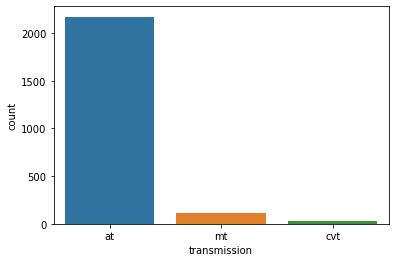

In [130]:
sns.countplot(df.transmission)

<AxesSubplot:xlabel='drive', ylabel='count'>

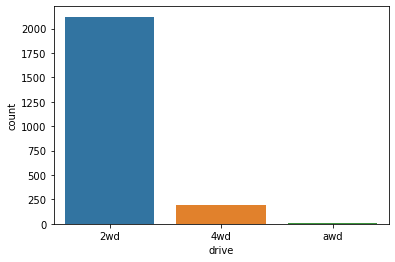

In [131]:
sns.countplot(df.drive)

<AxesSubplot:xlabel='hand_drive', ylabel='count'>

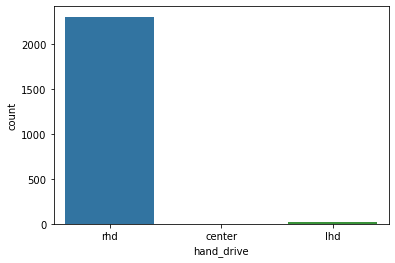

In [132]:
sns.countplot(df.hand_drive)

<AxesSubplot:xlabel='fuel', ylabel='count'>

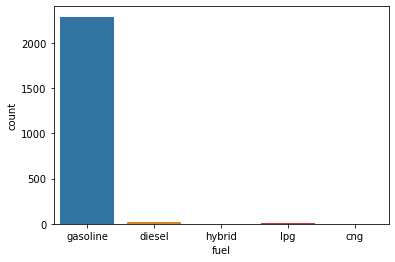

In [133]:
sns.countplot(df.fuel)

In [134]:
df.columns

Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

# Bivariant analysis

<AxesSubplot:xlabel='mark', ylabel='price'>

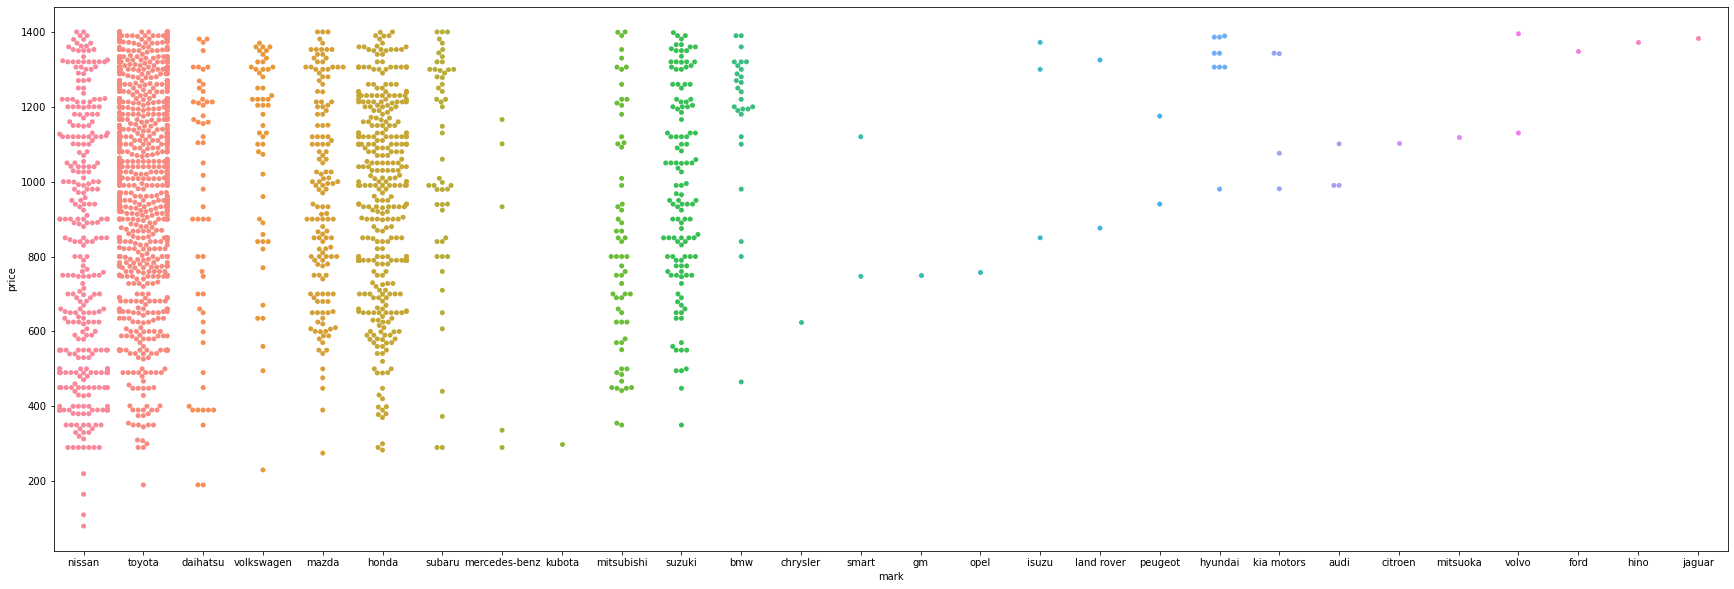

In [135]:
plt.figure(figsize=(30,10))
sns.swarmplot(x=df.mark,y=df.price)

<AxesSubplot:xlabel='year', ylabel='price'>

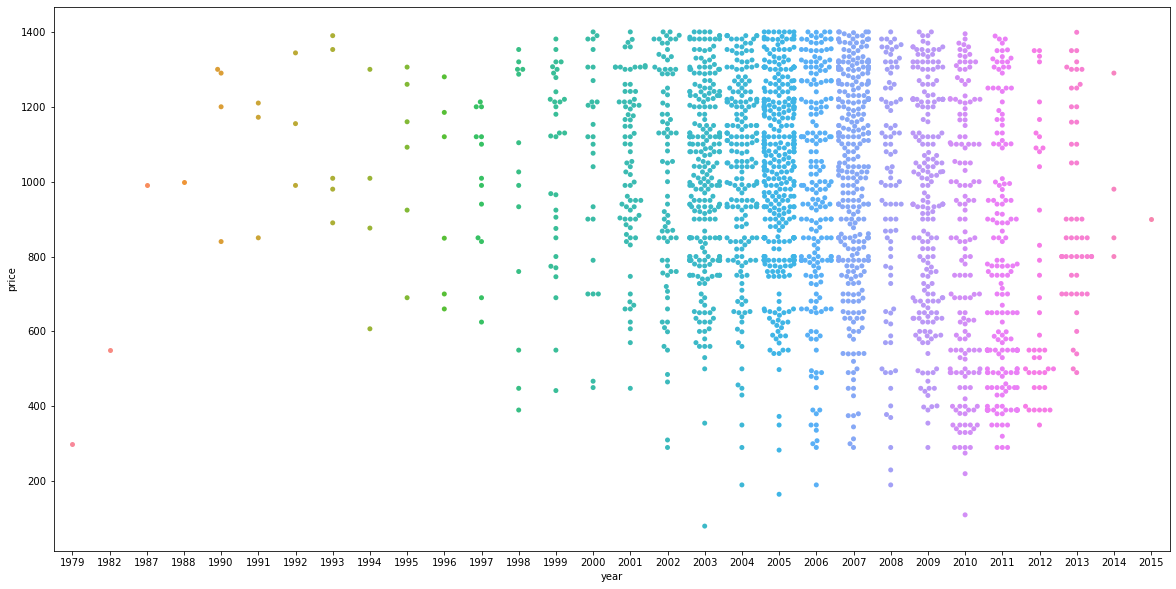

In [136]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df.year,y=df.price)

<AxesSubplot:xlabel='mileage', ylabel='price'>

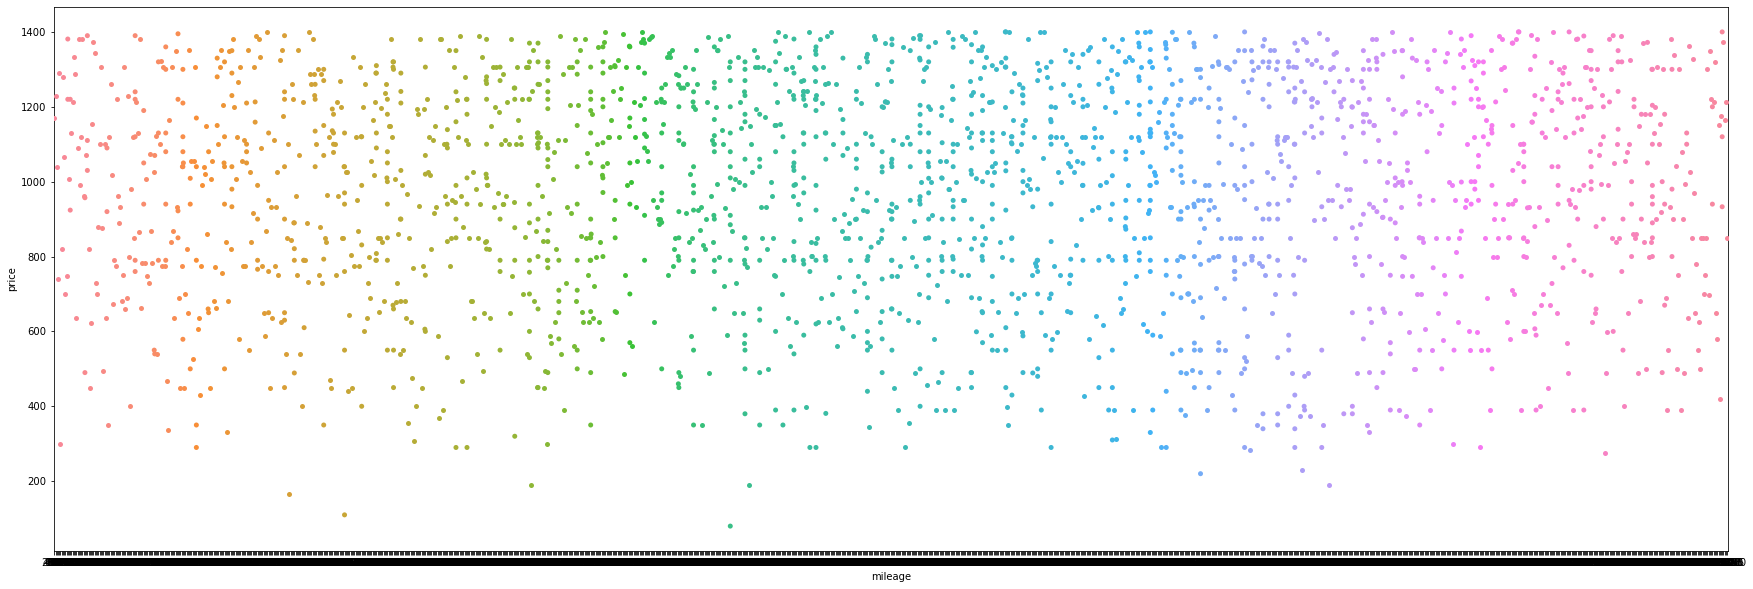

In [137]:
plt.figure(figsize=(30,10))
sns.swarmplot(x=df.mileage,y=df.price)

In [138]:
df.columns


Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

<AxesSubplot:xlabel='fuel', ylabel='price'>

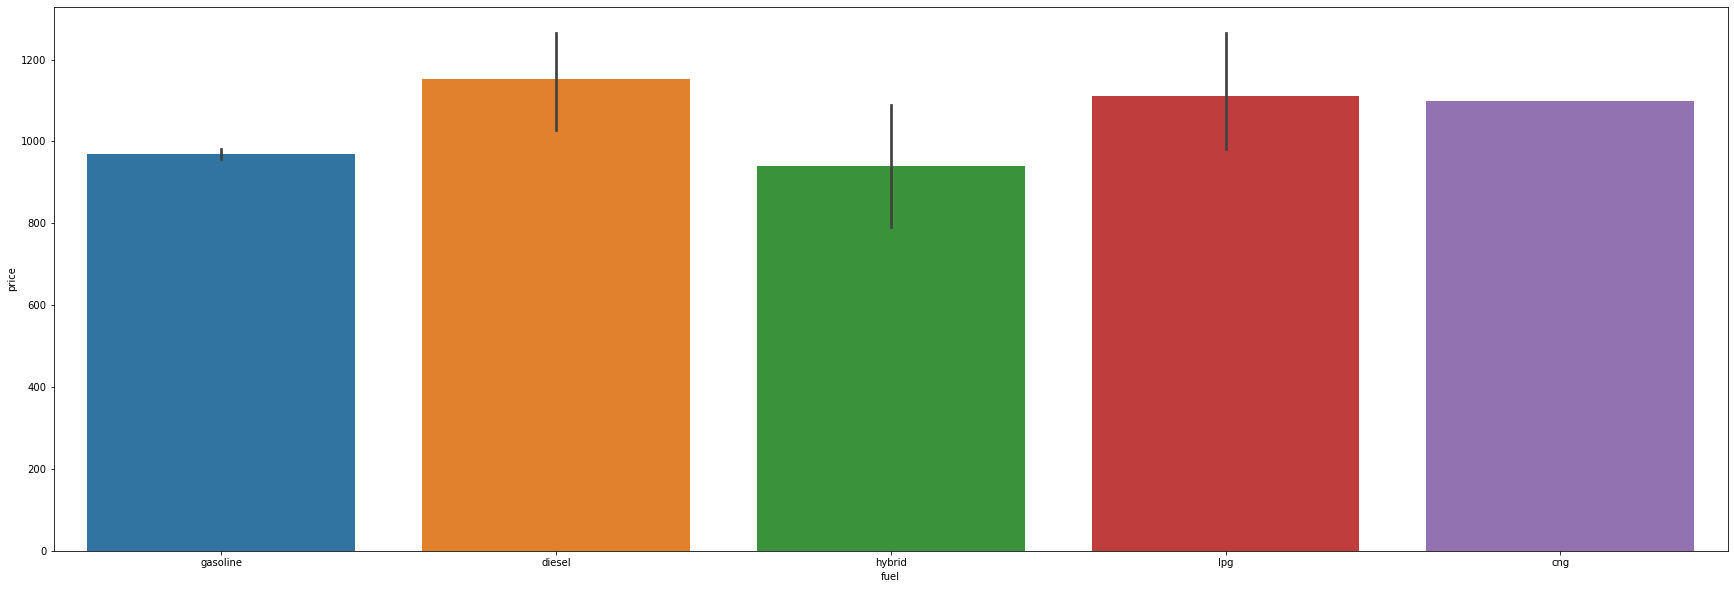

In [139]:
plt.figure(figsize=(30,10))
sns.barplot(x=df.fuel,y=df.price,data=df)

<AxesSubplot:xlabel='hand_drive', ylabel='price'>

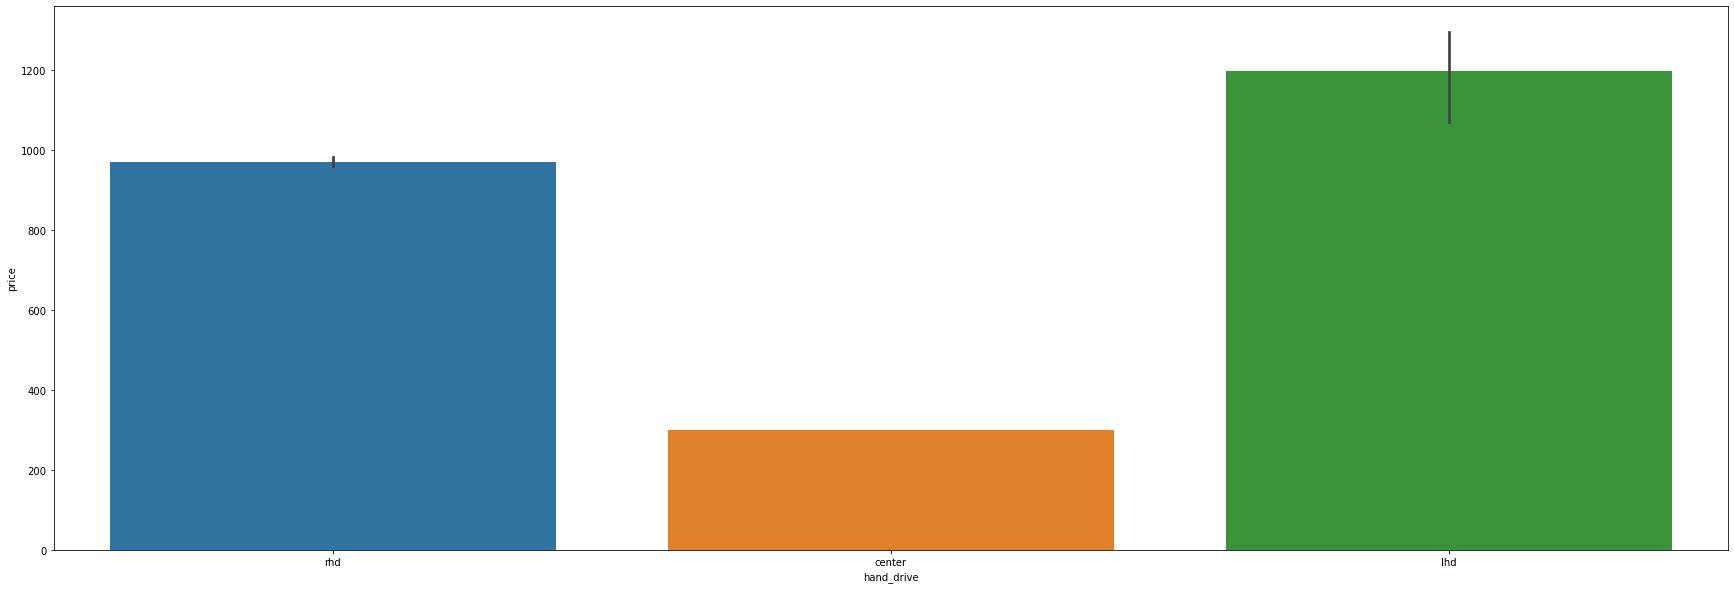

In [140]:
plt.figure(figsize=(30,10))
sns.barplot(x=df.hand_drive,y=df.price,data=df)

<AxesSubplot:xlabel='transmission', ylabel='price'>

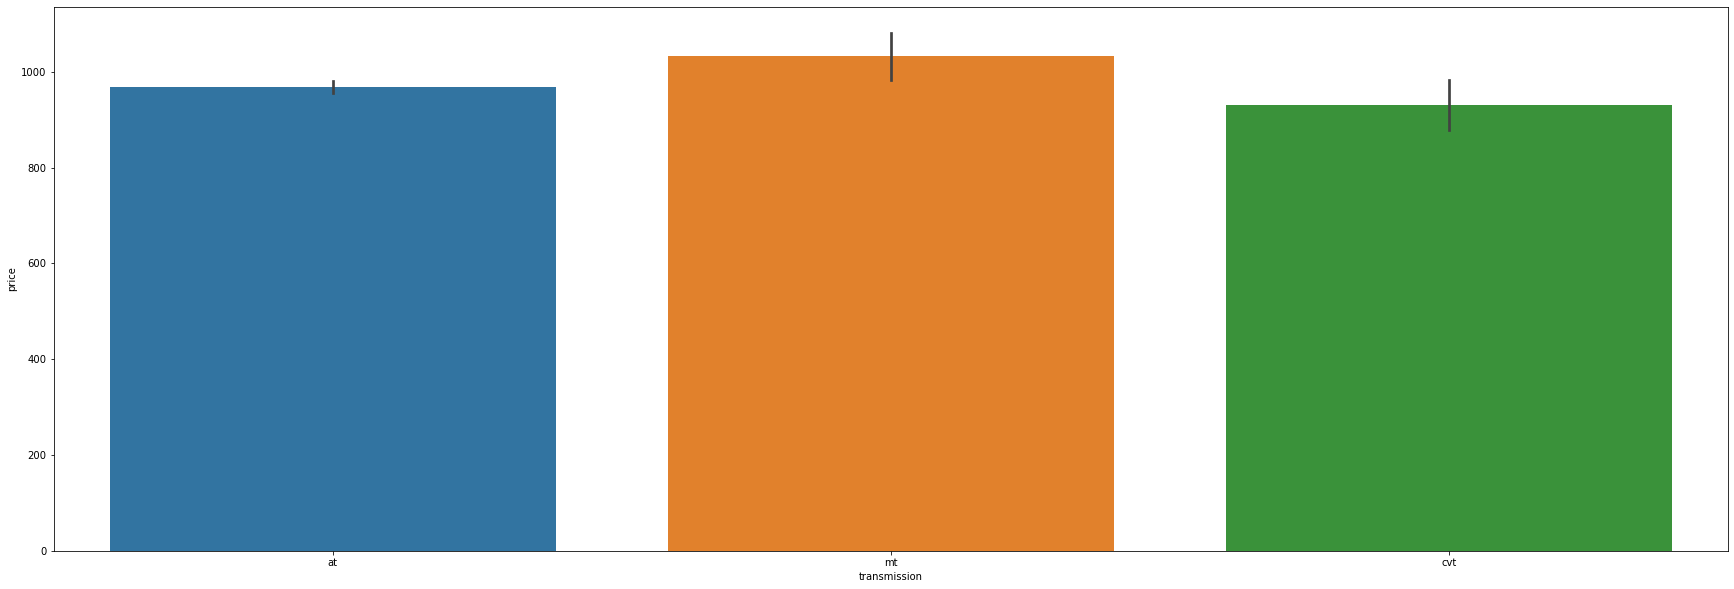

In [141]:
plt.figure(figsize=(30,10))
sns.barplot(x=df.transmission,y=df.price,data=df)

<AxesSubplot:xlabel='model', ylabel='price'>

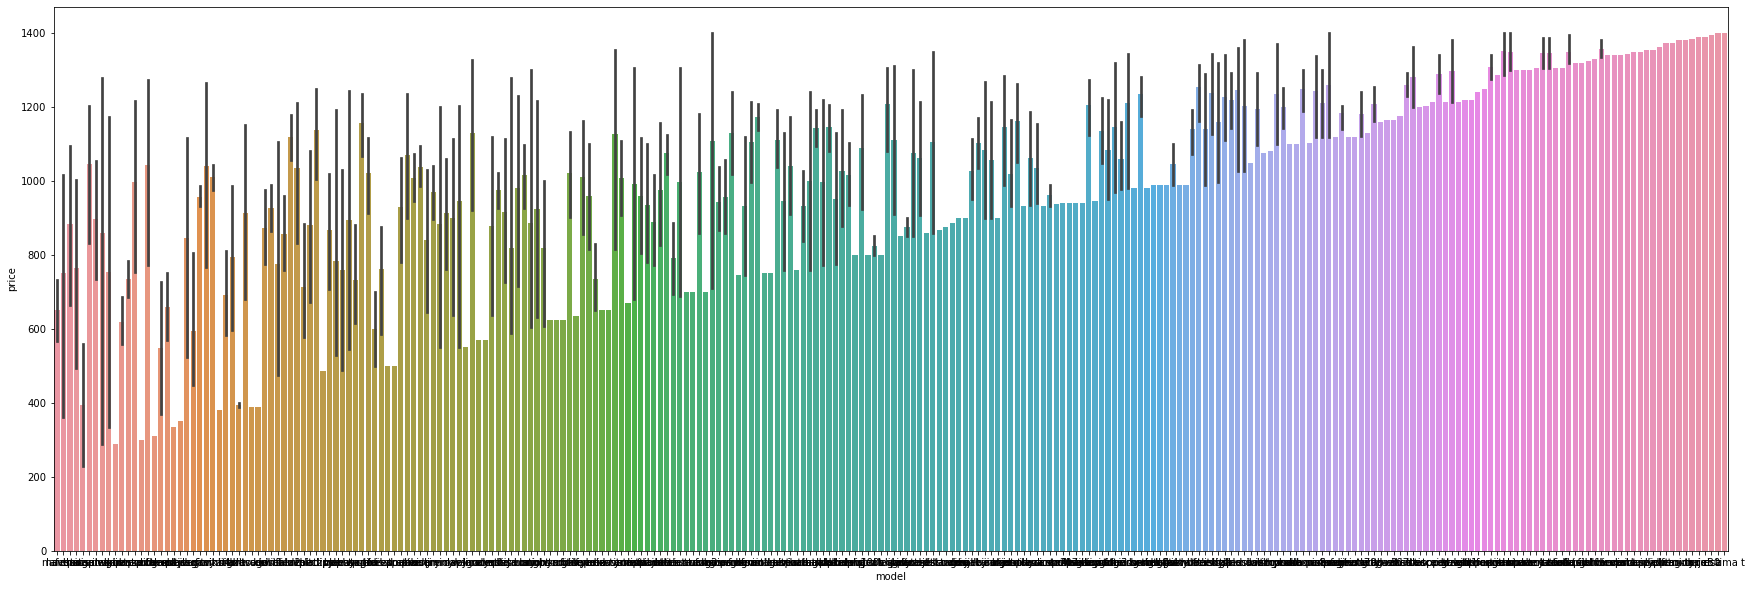

In [142]:
plt.figure(figsize=(30,10))
sns.barplot(x=df.model,y=df.price,data=df)

# Multivariate analysis:

<Figure size 4320x2160 with 0 Axes>

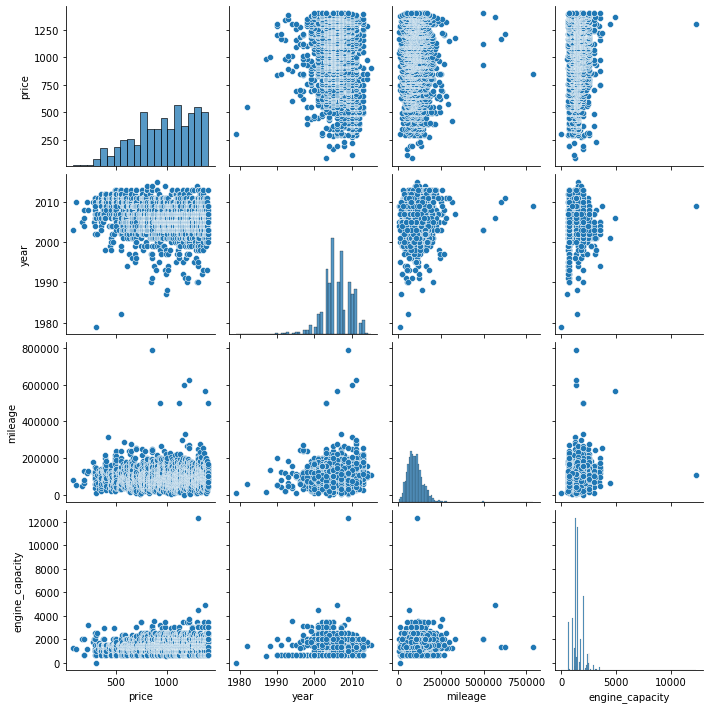

In [143]:
plt.figure(figsize=(60,30))
sns.pairplot(df)

# Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [12]:
df.mark=LE.fit_transform(df.mark)

In [13]:
df.model=LE.fit_transform(df.model)

In [14]:
df.drive=LE.fit_transform(df.drive)

In [15]:
df.transmission=LE.fit_transform(df.transmission)

In [16]:
df.hand_drive =LE.fit_transform(df.hand_drive)

In [17]:
df.fuel=LE.fit_transform(df.fuel)

In [18]:
df

price  mark  model  year  mileage  engine_capacity  transmission  drive  \
0        80    19    143  2003    80000             1240             0      0   
1       110    19    143  2010    53000             1200             0      0   
2       165    19    134  2005    47690             2000             0      0   
3       190    25     29  2008   130661             1990             0      0   
4       190     4    155  2006    66300              660             0      0   
5       190     4    155  2004    81400              660             0      0   
6       220    19    143  2010   117000             1200             0      0   
7       230    26    180  2008   127763             3190             0      1   
8       275    15     42  2010   178218             1800             2      0   
9       283     8    212  2005   121655             2000             0      0   
10      290    23    201  2004   121000              650             2      0   
11      290     8    127  2002    61000             2490             0      0   
12      290    16    149  2006    86000             2030             0      0   
13      290    19    143  2011    62000             1200             0      0   
14      290    19    143  2010    38000             1200             0      0   
15      290    19    143  2011   130000             1200             0      0   
16      290    19    143  2011   113000             1200             0      0   
17      290    19    143  2010   152300             1200             0      0   
18      290    19    170  2010   105000             1500             0      0   
19      290    19    143  2010    85700             1200             0      0   
20      290    25    181  2007   112700             1000             0      0   
21      290    23    123  2008   127000             1500             0      0   
22      290    25    181  2009    92800             1000             0      0   
23      300    13    133  1979     9999                9             2      1   
24      300     8    142  2006    67975              660             0      0   
25      300    25    181  2007   147933              990             0      0   
26      308    25     29  2006    58500             2390             0      0   
27      310    25    193  2002   109000             2490             0      0   
28      313    19     80  2007   109244             1500             0      0   
29      320    19    143  2011    65000             1200             0      0   
30      330    19    170  2010    42300             1500             0      0   
31      330    19    170  2010   135000             1500             0      0   
32      330    19     79  2010   112000             1500             0      0   
33      336    16      4  2006    34175             1700             0      0   
34      340    19    143  2010   127000             1200             0      0   
35      340    19     79  2010   123000             1500             0      0   
36      345    25    181  2007    90066             1000             0      0   
37      350    19    170  2010    71000             1500             0      0   
38      350    17     65  2005    23100             1500             0      0   
39      350    19    143  2011    78000             1200             0      0   
40      350    25    181  2010   134700             1000             0      0   
41      350    19    170  2011   143000             1500             0      0   
42      350    19    143  2011   125000             1200             0      0   
43      350    19     79  2010   130300             1500             0      0   
44      350    19    170  2006    38000             1500             0      0   
45      350    19     79  2010   122300             1500             0      0   
46      350    25    181  2011    78300             1000             0      0   
47      350    25    181  2010    82000             1000             0      0   
48      350    24    165  2006   1018

In [19]:
df.drive.unique()

array([0, 1, 2])

In [20]:
df.hand_drive.unique()

array([2, 0, 1])

# Detecting Outliers

In [21]:
columns=df.columns

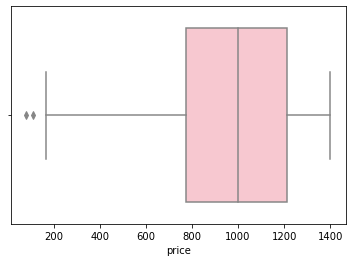

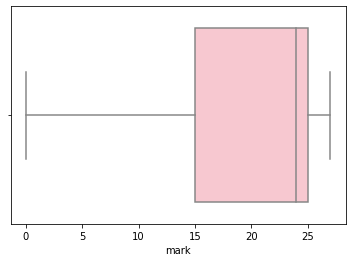

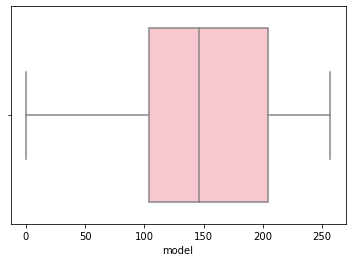

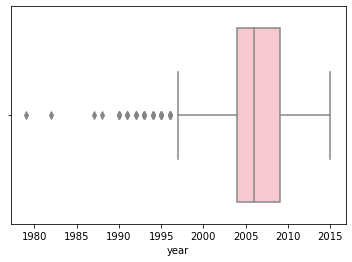

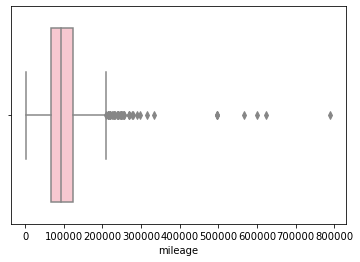

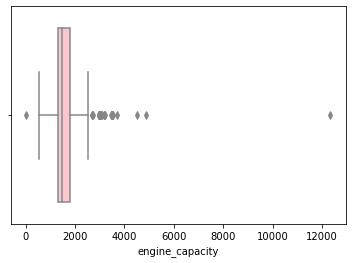

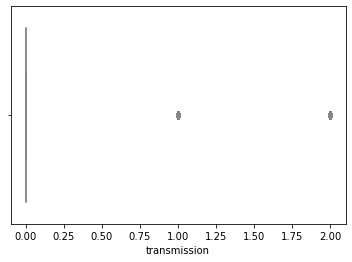

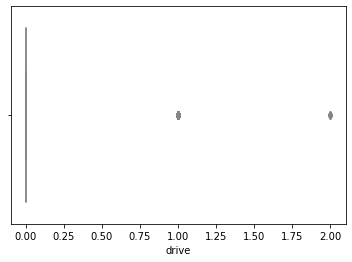

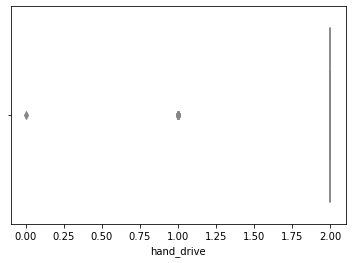

In [153]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],color='pink')
    
for i in range(0,9):
    bxplt(i)

In [154]:
df.shape

(2318, 10)

In [155]:
collist=df.columns.values
ncol=9
nrows=8


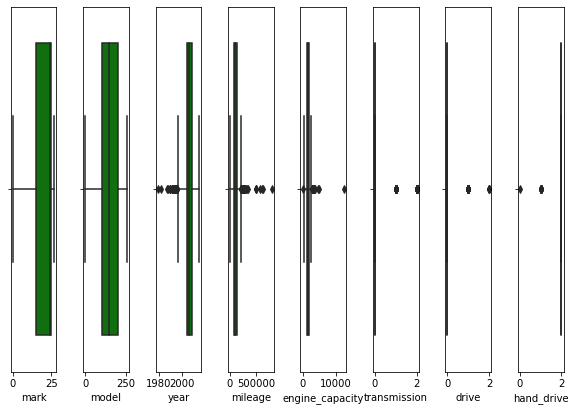

In [156]:
# to see outliers in a single visualization

plt.figure(figsize=(ncol,5*ncol))
for i in range(1,(len(collist)-1)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# lets remove Outliers

In [22]:
#zscore

from scipy.stats import zscore
z=np.abs(zscore(df))
z

price      mark     model      year    mileage  engine_capacity  \
0     3.089012  0.057772  0.071399  0.803769   0.381195         0.485945   
1     2.985066  0.057772  0.071399  1.089113   0.895470         0.558743   
2     2.794498  0.057772  0.202693  0.262946   0.996610         0.897214   
3     2.707876  0.783580  1.734453  0.548289   0.583755         0.879015   
4     2.707876  2.161152  0.103659  0.007466   0.642142         1.541515   
5     2.707876  2.161152  0.103659  0.533357   0.354529         1.541515   
6     2.603930  0.057772  0.071399  1.089113   0.323551         0.558743   
7     2.569281  0.923805  0.468364  0.548289   0.528556         3.062951   
8     2.413362  0.618673  1.544807  1.089113   1.489583         0.533225   
9     2.385643  1.600250  0.935186  0.262946   0.412216         0.897214   
10    2.361389  0.503129  0.774716  0.533357   0.399740         1.559714   
11    2.361389  1.600250  0.304810  1.074181   0.743092         1.788988   
12    2.361389  0.478448  0.016130  0.007466   0.266912         0.951813   
13    2.361389  0.057772  0.071399  1.359525   0.724045         0.558743   
14    2.361389  0.057772  0.071399  1.089113   1.181178         0.558743   
15    2.361389  0.057772  0.071399  1.359525   0.571165         0.558743   
16    2.361389  0.057772  0.071399  1.359525   0.247362         0.558743   
17    2.361389  0.057772  0.071399  1.089113   0.995917         0.558743   
18    2.361389  0.057772  0.322482  1.089113   0.094985         0.012759   
19    2.361389  0.057772  0.071399  1.089113   0.272626         0.558743   
20    2.361389  0.783580  0.482952  0.277878   0.241648         0.922733   
21    2.361389  0.503129  0.363163  0.548289   0.514023         0.012759   
22    2.361389  0.783580  0.482952  0.818701   0.137391         0.922733   
23    2.326740  0.899124  0.217281  7.293650   1.714519         2.726300   
24    2.326740  1.600250  0.085987  0.007466   0.610238         1.541515   
25    2.326740  0.783580  0.482952  0.277878   0.912738         0.940932   
26    2.299021  0.783580  1.734453  0.007466   0.790710         1.606993   
27    2.292091  0.783580  0.658011  1.074181   0.171173         1.788988   
28    2.281697  0.057772  0.990455  0.277878   0.175821         0.012759   
29    2.257443  0.057772  0.071399  1.359525   0.666903         0.558743   
30    2.222794  0.057772  0.322482  1.089113   1.099275         0.012759   
31    2.222794  0.057772  0.322482  1.089113   0.666401         0.012759   
32    2.222794  0.057772  1.005044  1.089113   0.228315         0.012759   
33    2.202005  0.478448  2.099158  0.007466   1.254033         0.351230   
34    2.188145  0.057772  0.071399  1.089113   0.514023         0.558743   
35    2.188145  0.057772  1.005044  1.089113   0.437834         0.012759   
36    2.170821  0.783580  0.482952  0.277878   0.189466         0.922733   
37    2.153497  0.057772  0.322482  1.089113   0.552620         0.012759   
38    2.153497  0.338223  1.209278  0.262946   1.464981         0.012759   
39    2.153497  0.057772  0.071399  1.359525   0.419290         0.558743   
40    2.153497  0.783580  0.482952  1.089113   0.660687         0.922733   
41    2.153497  0.057772  0.322482  1.359525   0.818778         0.012759   
42    2.153497  0.057772  0.071399  1.359525   0.475929         0.558743   
43    2.153497  0.057772  1.005044  1.089113   0.576879         0.012759   
44    2.153497  0.057772  0.322482  0.007466   1.181178         0.012759   
45    2.153497  0.057772  1.005044  1.089113   0.424501         0.012759   
46    2.153497  0.783580  0.482952  1.359525   0.413576         0.922733   
47    2.153497  0.783580  0.482952  1.089113   0.343101         0.922733   
48    2.153497  0.643355  0.249541  0.007466   0.034034         1.541515   
49    2.153497  0.783580  0.482952  0.533357   0.314530         0.922733   
50    2.153497  2.161152  0.103659  1.629936   0.933564         1.541515   
51    2.136172  0.783580  0.482952  0.818701   0.793053  

In [23]:
threshold=3
print(np.where(z>3))

(array([   0,    7,    7,    8,   10,   23,   23,   23,   23,   23,   52,
         54,   75,   87,  103,  111,  111,  132,  134,  138,  145,  146,
        160,  171,  171,  186,  196,  198,  243,  246,  247,  249,  249,
        253,  259,  268,  274,  293,  309,  312,  312,  314,  334,  353,
        359,  401,  401,  404,  406,  409,  414,  416,  432,  441,  444,
        446,  456,  466,  467,  472,  485,  492,  495,  495,  502,  503,
        507,  507,  508,  529,  533,  549,  551,  580,  594,  674,  675,
        681,  691,  693,  696,  696,  700,  723,  724,  729,  732,  738,
        739,  740,  740,  741,  741,  742,  743,  749,  750,  750,  751,
        752,  753,  811,  818,  818,  820,  823,  829,  834,  841,  842,
        842,  854,  862,  862,  869,  877,  879,  883,  891,  908,  913,
        926,  927,  927,  938,  940,  941,  954,  956,  956,  958,  970,
        971,  971,  973,  979, 1001, 1003, 1004, 1006, 1006, 1006, 1012,
       1019, 1024, 1036, 1046, 1065, 1065, 1066, 1

In [24]:
df_new1=df[(z<3).all(axis=1)]

In [25]:
#chcking data loss
data_loss=((df.shape[0]-df_new1.shape[0])/df.shape[0])*100
print(data_loss)

13.718723037100949


In [26]:
Q1=df.quantile(.25)
Q3=df.quantile(.75)
IQR=Q3-Q1
#removing Outliers using IQR method
df_new=df[~((df<(Q1<(Q1-1.5*IQR)))|(df>(Q3+1.5*IQR))).any(axis=1)]


In [27]:
#chcking data loss
data_loss1=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
print(data_loss1)

15.875754961173424


In [ ]:
since data loss is high in both method and to save Quality data we can go with current dataset with  outliers itself

In [28]:
df.shape

(2318, 10)

able to see data loss

# Skewness check

<AxesSubplot:xlabel='mark', ylabel='Density'>

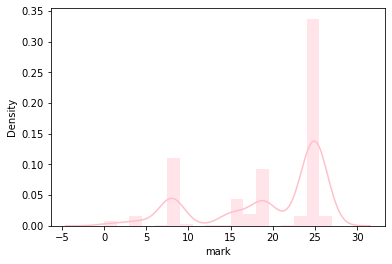

In [29]:
sns.distplot(df.mark,color='pink')


<AxesSubplot:xlabel='year', ylabel='Density'>

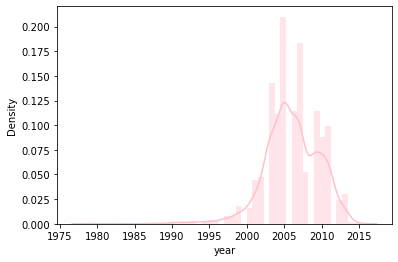

In [30]:
sns.distplot(df.year,color='pink')


<AxesSubplot:xlabel='mileage', ylabel='Density'>

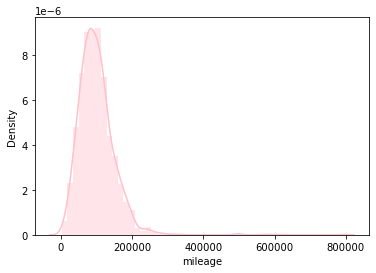

In [31]:
sns.distplot(df.mileage,color='pink')


<AxesSubplot:xlabel='engine_capacity', ylabel='Density'>

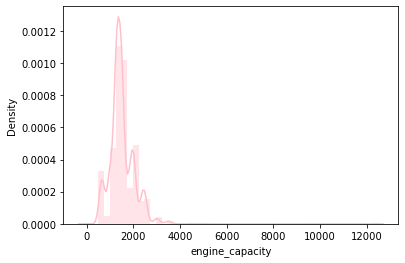

In [32]:
sns.distplot(df.engine_capacity,color='pink')


<AxesSubplot:xlabel='transmission', ylabel='Density'>

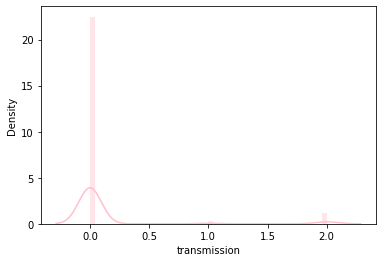

In [33]:
sns.distplot(df.transmission,color='pink')


<AxesSubplot:xlabel='drive', ylabel='Density'>

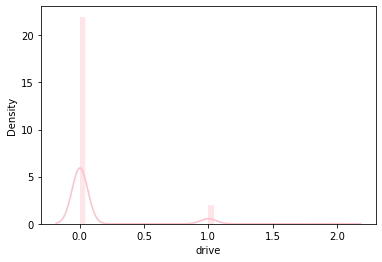

In [34]:
sns.distplot(df.drive,color='pink')


<AxesSubplot:xlabel='hand_drive', ylabel='Density'>

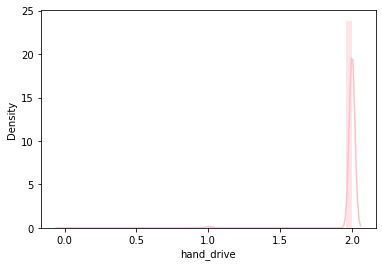

In [35]:
sns.distplot(df.hand_drive,color='pink')


<AxesSubplot:xlabel='fuel', ylabel='Density'>

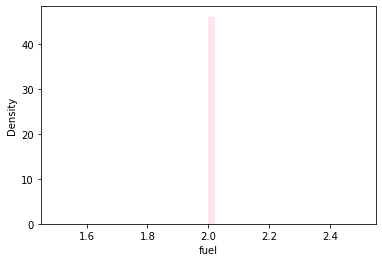

In [175]:
sns.distplot(df.fuel,color='pink')


In [36]:
#initialising x and y
X=df.drop(['price'],axis=1)
y=df.price

In [37]:
X.shape

(2318, 9)

In [38]:
y.shape

(2318,)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            2318 non-null   int64
 1   mark             2318 non-null   int32
 2   model            2318 non-null   int32
 3   year             2318 non-null   int64
 4   mileage          2318 non-null   int64
 5   engine_capacity  2318 non-null   int64
 6   transmission     2318 non-null   int32
 7   drive            2318 non-null   int32
 8   hand_drive       2318 non-null   int32
 9   fuel             2318 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 126.9 KB


In [40]:
X.skew().sort_values(ascending=False)

fuel                4.146744
engine_capacity     4.038892
transmission        3.820441
drive               3.193137
mileage             3.089142
model              -0.267060
year               -0.845917
mark               -0.947938
hand_drive        -12.811470
dtype: float64

we are able to observe fuel,transmission,drive,model,mark,hand_drive as categorical columns

mileage,engine_capacity  are having skewness so we need to remove it,rest are categorical

Reducing skewness

In [42]:
from sklearn.preprocessing import PowerTransformer



In [43]:
X['engine_capacity']=PowerTransformer().fit_transform(X['engine_capacity'].values.reshape(-1,1))

X['mileage']=PowerTransformer().fit_transform(X['mileage'].values.reshape(-1,1))

In [44]:
X.skew().sort_values(ascending=False)

fuel                4.146744
transmission        3.820441
drive               3.193137
engine_capacity     0.154166
mileage             0.101598
model              -0.267060
year               -0.845917
mark               -0.947938
hand_drive        -12.811470
dtype: float64

<AxesSubplot:xlabel='engine_capacity', ylabel='Density'>

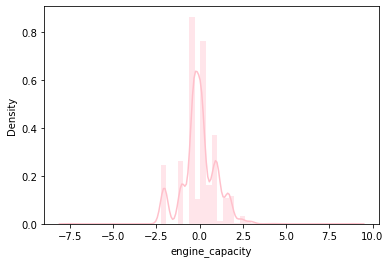

In [47]:
sns.distplot(X['engine_capacity'],color='pink')

<AxesSubplot:xlabel='mileage', ylabel='Density'>

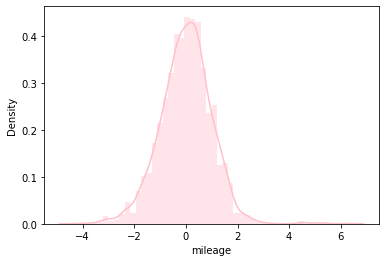

In [46]:
sns.distplot(X.mileage,color='pink')

In [48]:
temp=X.columns

In [49]:
temp

Index(['mark', 'model', 'year', 'mileage', 'engine_capacity', 'transmission',
       'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [50]:
X.shape[1]

9

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
#scaling the dataset 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [53]:
X_scaled

array([[-0.05777186, -0.07139909, -0.80376905, ..., -0.30091927,
         0.08389261,  0.01152207],
       [-0.05777186, -0.07139909,  1.0891129 , ..., -0.30091927,
         0.08389261,  0.01152207],
       [-0.05777186, -0.20269286, -0.26294564, ..., -0.30091927,
         0.08389261,  0.01152207],
       ...,
       [ 0.50312941,  0.68718712, -0.26294564, ..., -0.30091927,
         0.08389261,  0.01152207],
       [-1.60025037,  1.5770671 , -1.61500417, ...,  3.15220379,
         0.08389261,  0.01152207],
       [ 0.78358005, -0.68410334, -0.26294564, ..., -0.30091927,
         0.08389261,  0.01152207]])

In [54]:
X=pd.DataFrame(X_scaled,columns=temp)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X,i) for i in range(X.shape[1])]


In [57]:
vif["features"]=temp
vif

vif         features
0  1.167190             mark
1  1.173718            model
2  1.261295             year
3  1.073703          mileage
4  1.156599  engine_capacity
5  1.263794     transmission
6  1.128634            drive
7  1.261752       hand_drive
8  1.259832             fuel

In [ ]:
vif is less than 10 so no multicolinearity

# Correlation Check

In [58]:
df_cor=df.corr()

<AxesSubplot:>

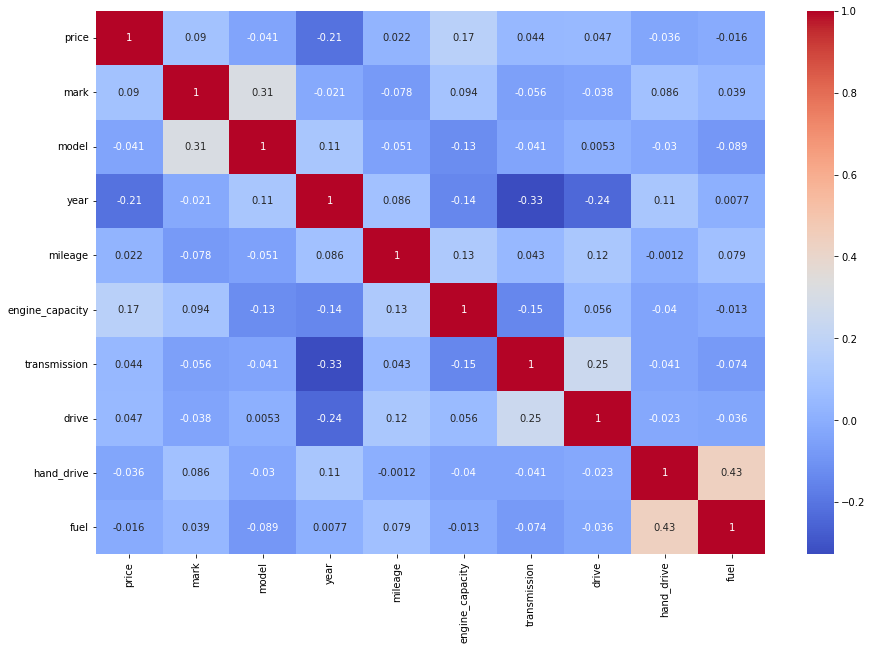

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,cmap='coolwarm',annot=True)

# Model Building

In [69]:
X.shape

(2318, 9)

In [61]:
y.shape

(2318,)

In [ ]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=14)

NameError: name 'x' is not defined

In [ ]:
# different algorithm going to use

lg=LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier()
sv=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=100)
ada=AdaBoostClassifier(n_estimators=100)

In [ ]:
#code for Training and Prediction 

def evaluate(x):
    model=x
    print(model)
    #training the model
    model.fit(x_train,y_train)
    #model prediction
    pred=model.predict(x_test)
    
    print("accuracy score is :",accuracy_score(y_test,pred)*100)
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

# calling function to run the model

In [ ]:
#calling LogisticRegression model
evaluate(lg)

In [ ]:
#calling GaussianNB model
evaluate(gnb)

In [ ]:
#calling KNeighborsClassifier model
evaluate(knn)

In [ ]:
#calling SVC model
evaluate(sv)

In [ ]:
#calling AdaBoostClassifier model
evaluate(ada)

In [ ]:
#calling DecisionTreeClassifier model
evaluate(dtc)

In [ ]:
#calling RandomForestClassifier model
evaluate(rfc)

# Cross validation of the models

In [ ]:
model=[lg,gnb,knn,sv,rfc,dtc,ada]

for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print(m,"Cross val score is ",score*100,"   ")
    print("mean is ",score.mean()*100,"\n\n")

# AUC_ROC CURVE

In [ ]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve 

In [ ]:
#lets see how well our model works on train data

model=[lg,gnb,knn,sv,rfc,dtc,ada]
for m in model:
    ax=m.fit(x_train,y_train)
    plot_roc_curve(ax,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#lets see how well our model works on test data

model=[lg,gnb,knn,sv,rfc,dtc,ada]
for m in model:
    plot_roc_curve(m,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

# Conclusion

In [ ]:

joblib.dump(rfc,"Japan_used_cars.obj")

In [ ]:
#Lets Check loading the file 

price_prediction=joblib.load()"Japan_used_cars.obj"

In [ ]:
price_prediction.score(x_test,y_test)

In [ ]:
pred=rfc.predict(x_test)
Conclusion=pd.DataFrame([price_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

# Model Created Succesfully